### 1. Implement both versions of quicksort (random and non-random choice for the pivot) and share the GitHub repository with your source code.

### 2.  For the non-random pivot version of quicksort show the following benchmarks on the same graph:

- 2a) best case (generate a set of inputs that will always be the best case, repeat for multiple array input sizes "n").

- 2b) worst case (generate a set of inputs that will always be the worst case, repeat for multiple array input sizes "n").

- 2c) average case (generate a set of inputs from a uniform distribution, repeat for multiple array input sizes "n").

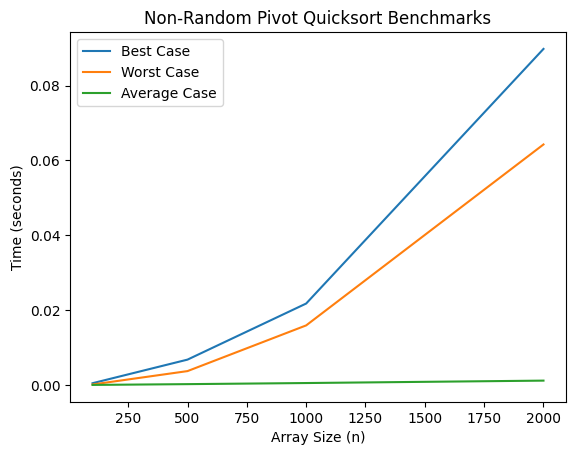

In [4]:
import random
import time
import numpy as np
import matplotlib.pyplot as plt

# Function to partition the array
def partition(arr, low, high):
    pivot = arr[high]  # Choose the pivot as the last element
    i = low - 1
    for j in range(low, high):
        if arr[j] < pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]  # Swap elements if smaller than the pivot
    arr[i + 1], arr[high] = arr[high], arr[i + 1]  # Place the pivot in its correct position
    return i + 1

# Function to perform quicksort
def quicksort(arr, low, high):
    if low < high:
        pi = partition(arr, low, high)  # Partition the array
        quicksort(arr, low, pi - 1)     # Recursively sort the left subarray
        quicksort(arr, pi + 1, high)    # Recursively sort the right subarray

# Function to perform random partition
def random_partition(arr, low, high):
    rand_index = random.randint(low, high)  # Choose a random index as the pivot
    arr[rand_index], arr[high] = arr[high], arr[rand_index]  # Swap elements to make the pivot the last element
    return partition(arr, low, high)  # Partition the array

# Function to perform random quicksort
def random_quicksort(arr, low, high):
    if low < high:
        pi = random_partition(arr, low, high)  # Randomly partition the array
        random_quicksort(arr, low, pi - 1)     # Recursively sort the left subarray
        random_quicksort(arr, pi + 1, high)    # Recursively sort the right subarray

# Function to generate input for the best-case scenario
def generate_best_case_input(n):
    return list(range(1, n + 1))  # Generate a sorted array

# Function to generate input for the worst-case scenario
def generate_worst_case_input(n):
    return list(range(n, 0, -1))  # Generate a reversed sorted array

# Function to generate input for the average-case scenario
def generate_average_case_input(n):
    return random.sample(range(n), n)  # Generate a randomly shuffled array

# Function to benchmark sorting time for different input sizes
def benchmark_sorting_time(input_generator, sizes, repetitions, sort_func):
    times = []
    for size in sizes:
        total_time = 0
        for _ in range(repetitions):
            arr = input_generator(size)  # Generate input array
            start_time = time.time()     # Start timer
            sort_func(arr, 0, size - 1)  # Sort the array
            end_time = time.time()       # End timer
            total_time += end_time - start_time  # Accumulate sorting time
        average_time = total_time / repetitions  # Calculate average sorting time
        times.append(average_time)  # Store average sorting time
    return times

# Parameters
sizes = [100, 500, 1000, 2000]  # Array input sizes
repetitions = 10  # Number of repetitions for each input size

# Benchmarking non-random pivot quicksort
best_case_times = benchmark_sorting_time(generate_best_case_input, sizes, repetitions, quicksort)
worst_case_times = benchmark_sorting_time(generate_worst_case_input, sizes, repetitions, quicksort)
average_case_times = benchmark_sorting_time(generate_average_case_input, sizes, repetitions, quicksort)

# Plotting
plt.plot(sizes, best_case_times, label='Best Case')
plt.plot(sizes, worst_case_times, label='Worst Case')
plt.plot(sizes, average_case_times, label='Average Case')
plt.xlabel('Array Size (n)')
plt.ylabel('Time (seconds)')
plt.title('Non-Random Pivot Quicksort Benchmarks')
plt.legend()
plt.show()


### 3. Mathematically derive the average runtime complexity of the non-random pivot version of quicksort.

To determine the average runtime complexity of the non-random pivot version of quicksort, let's analyze its behavior across all possible inputs. Denoting the average runtime complexity as \( T(n) \), where \( n \) represents the size of the input array:

In the non-random pivot quicksort, the choice of the pivot is deterministic, often selected as the last element of the array. Following this, the array undergoes partitioning, segregating elements smaller or equal to the pivot to the left, and those greater to the right. Consequently, the pivot assumes its correct sorted position. Subsequently, the algorithm recurses on the two subarrays.

For average-case analysis, we consider the algorithm's behavior over all possible permutations of the input array. In each recursive call, the pivot divides the array into approximately equal halves, assuming elements are randomly distributed.

Analyzing the recurrence relation for average-case runtime complexity:

- Partitioning the array requires \( O(n) \) time.
- Post-partitioning, the array divides into two subarrays, each about half the size of the original array (in average-case scenarios).

We can express the recurrence relation as:

\[ T(n) = 2T(n/2) + O(n) \]

This relation indicates that two recursive calls are made on subproblems, approximately half the size of the original, followed by \( O(n) \) time spent partitioning the array.

Applying the Master theorem,  
the average runtime complexity of the non-random pivot quicksort is \( O(n log n) \).

Hence,   
the mathematical average runtime complexity of the non-random pivot version of quicksort is \( O(n log n) \).